## RandomForestClassifier

documentation:  http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if *bootstrap=True* (default).

Can be applied to classification and regression problems as well. /RandomForestRegressor()/

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import pandas as pd

### Data

According to the given characteristics of the bio molecule, it is required to determine whether a biological response will be given ("Activity" - biological response or a signal transmission).

Dataset is normalized.

In [3]:
bioresponce = pd.read_csv("bioresponse.csv", header=0, sep=',')

In [4]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
bioresponce.shape

(3751, 1777)

In [6]:
bioresponce.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [7]:
bioresponce_target = bioresponce.Activity.values

In [8]:
print ('bioresponse = 1: {:.2f}\nbioresponse = 0: {:.2f}'.format(sum(bioresponce_target)/float(len(bioresponce_target)),
                1.0 - sum(bioresponce_target)/float(len(bioresponce_target))))

bioresponse = 1: 0.54
bioresponse = 0: 0.46


In [9]:
bioresponce_data = bioresponce.iloc[:, 1:]

### Model RandomForestClassifier

Let's analyze the dependence of the model accuracy on the size of the training set.

#### 1. Learning curves for shallow trees


In [10]:
rf_classifier_low_depth = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [11]:
train_sizes, train_scores, test_scores = learning_curve(rf_classifier_low_depth, bioresponce_data, bioresponce_target,
                                                                       train_sizes=np.arange(0.1,1., 0.2),
                                                                       cv=3, scoring='accuracy')

In [12]:
print("train_sizes = ", train_sizes)
print("Mean train scores = ", train_scores.mean(axis = 1))
print("Mean test scores = ", test_scores.mean(axis = 1))

train_sizes =  [ 250  750 1250 1750 2250]
Mean train scores =  [0.74933333 0.71333333 0.68453333 0.69104762 0.69022222]
Mean test scores =  [0.62356685 0.64195598 0.65369955 0.66248974 0.66728527]


In [13]:
df = pd.DataFrame(np.array([train_sizes, train_scores.mean(axis = 1), test_scores.mean(axis = 1)]).T, columns =["train size", "train score", "test score"])
df

,train size,train score,test score
0,250.0,0.749333,0.623567
1,750.0,0.713333,0.641956
2,1250.0,0.684533,0.653700
3,1750.0,0.691048,0.662490
4,2250.0,0.690222,0.667285


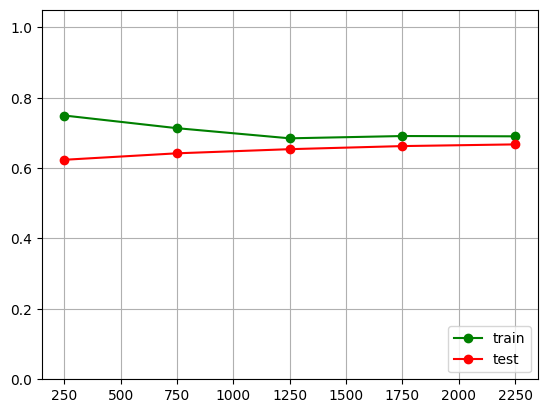

In [14]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

#### 2. Learning curves for deep trees


In [15]:
# increase the depth
rf_classifier = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [16]:
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, bioresponce_data, bioresponce_target,
                                                                       train_sizes=np.arange(0.1,1, 0.2),
                                                                       cv=3, scoring='accuracy')

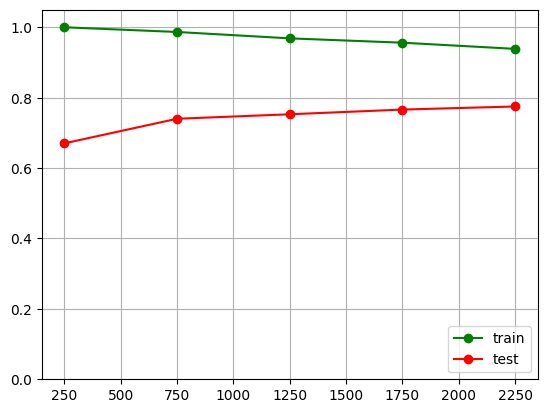

In [17]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

#### Conclusion:

The appropriate size of the training set is related to the complexity of the model.

For simple models, it does not make sense to add a lot of data to the training, since this does not affect the quality improvement: the model will not be able to “remember” such a volume of information.

In the case of quite complex models, an increase in the training sample may lead to an increase in quality.